Importing necessary packages:

In [2]:
import numpy as np                 # Package for scientific computing 
import sympy as sm                 # Package for symbolic mathematics
import scipy                       # Package that contains features for optimization 
from scipy import optimize         # For maximizing and minimizing functions
import matplotlib.pyplot as plt    # Package for creating figures
from collections import Counter    # To count number of observations in a vector
import ipywidgets as widgets       # To make interactive plots
sm.init_printing(use_unicode=True) #Used for pretty printing 

# Human capital accumulation

In the following part of the project we will solve the human capital accumulation problem. Firstly, we introduce the model (Taken directly from the task):

## Introduction to the model

Consider a worker living in **two periods**, $t \in \{1,2\}$. 

In each period she decides whether to **work ($l_t = 1$) or not ($l_t = 0$)**. 

She can *not* borrow or save and thus **consumes all of her income** in each period. 

If she **works** her **consumption** becomes:

$$c_t = w h_t l_t\,\,\text{if}\,\,l_t=1$$

where $w$ is **the wage rate** and $h_t$ is her **human capital**. 

If she does **not work** her consumption becomes:

$$c_t = b\,\,\text{if}\,\,l_t=0$$

where $b$ is the **unemployment benefits**.

Her **utility of consumption** is: 

$$ \frac{c_t^{1-\rho}}{1-\rho} $$

Her **disutility of working** is:

$$ \gamma l_t $$

From period 1 to period 2, she **accumulates human capital** according to:

$$ h_2 = h_1 + l_1 + 
\begin{cases}
0 & \text{with prob. }0.5 \\
\Delta & \text{with prob. }0.5 
\end{cases} \\
$$

where $\Delta$ is a **stochastic experience gain**.

In the **second period** the worker thus solves:

$$
\begin{eqnarray*}
v_{2}(h_{2}) & = &\max_{l_{2}} \frac{c_2^{1-\rho}}{1-\rho} - \gamma l_2
\\ & \text{s.t.} & \\
c_{2}& = & w h_2 l_2 \\
l_{2}& \in &\{0,1\}
\end{eqnarray*}
$$

In the **first period** the worker thus solves:

$$
\begin{eqnarray*}
v_{1}(h_{1}) &=& \max_{l_{1}} \frac{c_1^{1-\rho}}{1-\rho} - \gamma l_1 + \beta\mathbb{E}_{1}\left[v_2(h_2)\right]
\\ & \text{s.t.} & \\
c_1 &=& w h_1 l_1 \\
h_2 &=& h_1 + l_1 + \begin{cases}
0 & \text{with prob. }0.5\\
\Delta & \text{with prob. }0.5 
\end{cases}\\
l_{1} &\in& \{0,1\}\\
\end{eqnarray*}
$$

where $\beta$ is the **discount factor** and $\mathbb{E}_{1}\left[v_2(h_2)\right]$ is the **expected value of living in period two**.

The **parameters** of the model are:

In [3]:
rho = 2
beta = 0.96
gamma = 0.1
w = 2
b = 1
Delta = 0.1

The **relevant levels of human capital** are:

In [4]:
h_vec = np.linspace(0.1,1.5,100)

## Solving question 1

**Question 1:** Solve the model in period 2 and illustrate the solution (including labor supply as a function of human capital). 

### Utility of human capital

In order to solve question 1 we start by finding the utility of human capital. The first thing we do is defining the functions. We set consumption and $v_2$ to return different values depending on whether she works or not.

In [5]:
# Defining consumption
def consumption(w,h,l):
    if l == 1:
        return w*h*l
    else:
        return b

# Defining utility 
def utility(c,rho):
    return c**(1-rho)/(1-rho)

# Defining disutility
def disutility(gamma,l):
    return gamma*l

# Defining v2
def v2(rho,gamma,w,b,h2,l2):
    if l2 == 1: 
        return utility(w*h2,rho)-gamma*l2
    else:
        return utility(b,rho)


We solve the model for period 2 with respect to to utility of human capital. Firstly, we create two arrays where the first one will maximize the utility of working and the second one is an empty array where we store future values of $l_2$. We then loop over the values of human capital to maximize utility and we append the values to our empty $l_2$ array.

In [6]:
def utility_of_working(u2_working,u2_unemployment):
    
    # Arrays 
    u2_array = np.maximum(u2_working,u2_unemployment)
    l2_array = []
    
    # Looping
    for i, h in enumerate(h_vec):
        if u2_working[i] > u2_unemployment[i]:
            l2_array.append(1)
        else:
            l2_array.append(0)
   
    return u2_array,l2_array

Now we define our solution function. We create an empty array of zeros with the same lenght as h_vec and adds the $v_2$ value when she is unemployed and the $v_2$ value when she is working. 

In [7]:
def solution_p2(h_vec,rho,gamma,beta,w,b):

    u2_unemployment = np.zeros(len(h_vec)) + v2(rho,gamma,w,b,h_vec,0)
    u2_working = v2(rho,gamma,w,b,h_vec,1)

    u2_array,l2_array = utility_of_working(u2_unemployment, u2_working)
    
    return u2_unemployment, u2_working, u2_array, l2_array

We call the functions.

In [8]:
u2_unemployment, u2_working, u2_array, l2_array = solution_p2(h_vec,rho,gamma,beta,w,b)

Finally, we plot the figure.

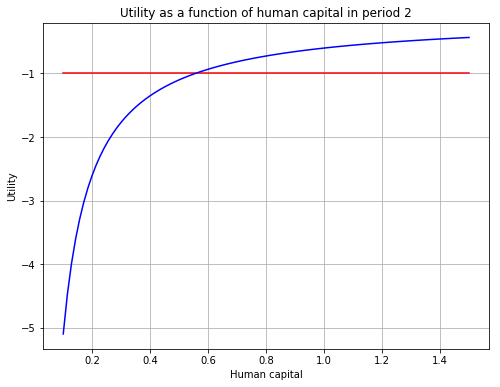

In [9]:
# Plotting figure
fig = plt.figure(figsize=(8,6)) 

# Adding subplot
ax = fig.add_subplot(1,1,1) 

# Plotting utility when she is unemployed
ax.plot(h_vec,u2_unemployment, c='r')

# Plotting utility when she is working
ax.plot(h_vec,u2_working, c='b')

# Setting title
ax.set_title('Utility as a function of human capital in period 2')

# Setting x label
ax.set_xlabel('Human capital')

# Setting y label
ax.set_ylabel('Utility') 

# Adding grid
ax.grid(True)

The blue line represents the utility the worker gets from working, while the red line represents the utility she gets from the unemployment benefits. This means that she will decide to stay unemployed when human capital is approximately below 0.56, but when human capital is above 0.56 she will work as the utility of working is higher than the utility of the unemployment benefits. In other words she will maximize utility by being on the red line until she reaches 0.56, where she will shift towards she blue line.

### Labour supply of human capital

We then solve the model for labour with respect to human capital in period 2. In order to do this we redefine our $v_2$ function. 

In [10]:
# Defining v2
def v2(rho,gamma,w,b,h2,l2):
    return utility(consumption(w,h2,l2),rho)-disutility(gamma,l2)

We create two empty arrays for $v_2$ and $l_2$ - each with a shape of 100. Then we loop over each level of human capital in h_vec to find out which value of $l_2$ that maximizes $v_2$ and we append the value of $v_2$ to our empty $v_2$ array.

In [11]:
def solution_period2(rho,gamma,w,b,h_vec):

    # Creating empty arrays for v2 and l2.
    v2_array = np.empty(100)
    l2_array = np.empty(100)

    # Looping over the values of human capital to find out which value of h that maximizes v2
    for i,h in enumerate(h_vec):
        if (v2(rho, gamma,w,b,h,1) > v2(rho,gamma,w,b,h,0)) == True:
            l2_array[i] = 1
        else:
            l2_array[i] = 0
        
    # Appending l2 to the empty array
    v2_array[i] = v2(rho,gamma,w,b,h,l2_array[i])
               
    return v2_array, l2_array

We call the functions.

In [12]:
v2_array,l2_array = solution_period2(rho,gamma,w,b,h_vec)

Finally, we plot the figure.

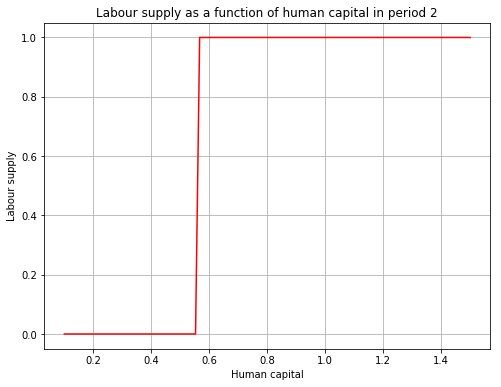

In [13]:
# Plotting figure
fig = plt.figure(figsize=(8,6))

# Adding subplot
ax = fig.add_subplot(1,1,1)

# Setting title
ax.set_title('Labour supply as a function of human capital in period 2')

# Plotting labour supply
ax.plot(h_vec, l2_array, c='r')

# Setting y label
ax.set_ylabel('Labour supply')

# Setting x label
ax.set_xlabel('Human capital')

# Adding grid
ax.grid(True)

The above figure shows that she will not supply any labour in period 2 when human capital is below 0.56. When human capital exceeds 0.56 she will supply all her labour represented by the vertical shift of the red line. This also supports the previous figure where utility of unemployment was higher than utility of working when human capital was below 0.56, and utility of working was higher than utility of employment when human capital exceded 0.56.

## Solving question 2

**Question 2:** Solve the model in period 1 and illustrate the solution (including labor supply as a
function of human capital).

### Utility of human capital

We once again redefine our consumption and utility function. Furthermore, we count the number of observations in h_vec that is smaller or equal to 0.56, since we from the previous question know that she will not supply any labour below this level of human capital.

In [14]:
# Defining consumption
def consumption(w,b,h,l):
    if l == 1:
        return w*h*l
    if l == 0:
        return b

# Defining utility
def utility(w,b,h,l):
    return (consumption(w,b,h,l)**(1-rho))/(1-rho) - gamma*l

# Counting number of observations in h_vec below 0.56
Counter(h_vec>=0.56)

Counter({False: 33, True: 67})

We define our utility function of $v_1$. 

In [15]:
# Defining utility of v1
def utility_v1(w,b,h,l):
    
    # Creating an empty list to store future values of utility
    utilities = []
    
    # When she supplies labour
    if l == 1:
        for i in range(0,100):
            utilities.append(utility(w,b,h[i],l)+ beta*utility(w,b,h[i],1))
            
    # When she is unemployed
    if l == 0:
        for i in range(0,33):
            utilities.append(utility(w,b,h[i],l) + beta*utility(w,b,h[i],0))
        
        for i in range(33,100):
            utilities.append(utility(w,b,h[i],l) + beta*utility(w,b,h[i],1))
    return utilities

We plot the figure:

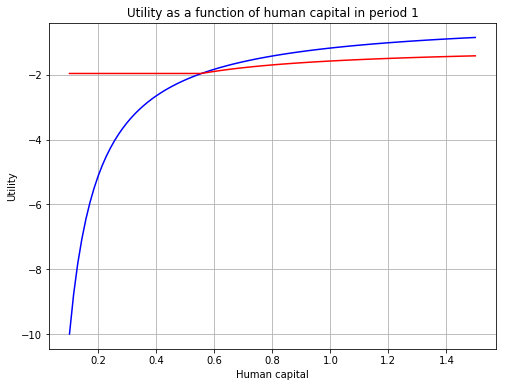

In [16]:
# Plotting figure
fig = plt.figure(figsize=(8,6))

# Adding subplot
ax = fig.add_subplot(1,1,1)

# Plotting utility when working
ax.plot(h_vec, utility_v1(w,b,h_vec,1), c='b')

# Plotting utility when unemployed
ax.plot(h_vec, utility_v1(w,b,h_vec,0), c='r')

# Setting title
ax.set_title('Utility as a function of human capital in period 1')

# Setting x label
ax.set_xlabel('Human capital')

# Setting y label
ax.set_ylabel('Utility')

# Adding grid
plt.grid(True)

The red line represents her utility when she stays unemployed while the blue line represents her utility when supplying labour. From the figure we can conclude that she will decide to stay unemployed until the red line intersects with the blue line at a rate of 0.56 in human capital. She will then decide to work hereafter. 

### Labour supply of human capital

We will now find the labour supply of human capital. Once again we redfine our functions.

In [17]:
# Defining consumption
def consumption(w,h,l,b):
    return w*h*l+b*(1-l)

# Defining utility
def utility(c,rho):
    return c**(1-rho)/(1-rho)

We then define the $v_1$ function in which we calculate the expected value of $v_2$. Firstly, we calculate $h_2$ with and without human capital and we then find the expected value of $v_2$.

In [18]:
# Defining v1
def v1(w, b, h1, rho, gamma, Delta, beta, l1):
    
    # Accumulation of human capital
    h2_hc = h1+l1+Delta
    h2_no_hc = h1+l1
    
    # Value of v2 when you take probability aspect into account
    v2_expected = 0.5*h2_hc+0.5*h2_no_hc
    
    return utility(consumption(w,h1,l1,b),rho)-disutility(gamma,l1)+beta*v2_expected

We then solve the model for period 1.

In [19]:
# Defining solution
def solution_period1(rho, w, b, h_vec, gamma, Delta,beta):

    # Creating empty arrays for v1 and l1 - each with a shape of 100.
    v1_array = np.empty(100)
    l1_array = np.empty(100)
    
    # Looping over the values of human capital to find out which value of l1 that maximizes v1
    for i,h in enumerate(h_vec):
        if (v1(w,b,h,rho,gamma, Delta, beta, 1) > v1(w,b,h,rho,gamma, Delta, beta, 0)) == True:
            l1_array[i]=1
        else:
            l1_array[i]=0
            
    # Appending v1 to the empty array
    v1_array[i] = v1(w, b, rho, gamma, h, Delta, beta,l1_array[i])
    
    return v1_array, l1_array

We call the functions.

In [20]:
v1_array, l1_array = solution_period1(rho,w,b,h_vec,gamma,Delta,beta)

Finally we plot the figure:

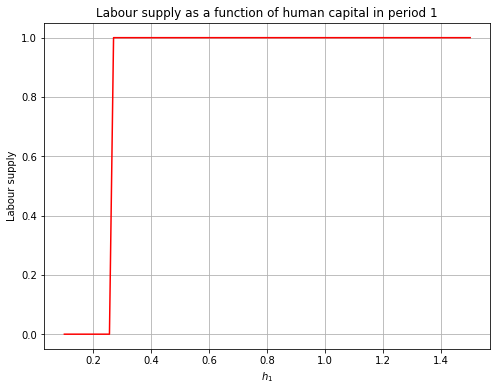

In [21]:
# Plotting figure
fig = plt.figure(figsize=(8,6))

# Adding subplot
ax = fig.add_subplot(1,1,1)

# Plotting labour supply
ax.plot(h_vec, l1_array, c='r')

# Setting title
ax.set_title('Labour supply as a function of human capital in period 1')

# Setting y label
ax.set_ylabel('Labour supply')

# Setting x label
ax.set_xlabel('$h_1$')

# Adding grid
ax.grid(True)

The red line represents her labour supply in period 1. She will decide to supply no labour and thus stay unemployed when human capital is below approximately 0.28. When human capital exceeds 0.28 she will decide to supply all her labour represented by ther vertical shift in the red line. If we compare this figure to the identical one from question 1 we see that she will decide to supply labour at a lower level of human capital in period 1 compared to period 2. The reason for this is that the gains of human capital can improve her utility in period 2 as well which makes her more prone to decide to work in period 1.

## Solving question 3

**Question 3:** Will the worker never work if her potential wage income is lower than the unemployment benefits she can get? Explain and illustrate why or why not.

From the above figures of labour supply as a function of human capital we can conclude that she will decide at lower rates of human capital in period 1 compared to period 2. From looking at the functions it is clear that she may decide to work even though the benefits of unemployment is bigger than the potential wage. This just requires that gains of human capital is high enough to compensate for the lower wage. 

We set the potential wage to be lower than the benefits of working.

In [22]:
w = 0.99
b = 1

We then do exactly the same as we did when we found the labour supply function in period 2. We redefine our functions.

In [23]:
# Defining consumption
def consumption(w,b,h,l):
    if l == 1:
        return w*h*l
    else:
        return b
    
# Defining v2
def v2(rho,gamma,w,b,h2,l2):
    return utility(consumption(w,b,h2,l2),rho)-disutility(gamma,l2)

We then create our function to create a solution.

In [24]:
# Defining solution function
def wage_vs_unemployment_benifits(rho,gamma,w,b,h_vec):

    # Creating empty arrays for v2 and l2 - each with a shape of 100.
    v2_array = np.empty(100)
    l2_array = np.empty(100)

    # Looping over the values of human capital to find out which value of l2 that maximizes v2
    for i,h in enumerate(h_vec):
        if (v2(rho, gamma,w,b,h,1) > v2(rho,gamma,w,b,h,0)) == True:
            l2_array[i] = 1
        else:
            l2_array[i] = 0
        
    # Appending l2 to the empty array
    v2_array[i] = v2(rho, gamma, w, b, h,l2_array[i])
               
    return v2_array, l2_array

We call the function.

In [25]:
v2_array,l2_array = wage_vs_unemployment_benifits(rho, gamma,w,b,h_vec)

Finally we plot the figure.

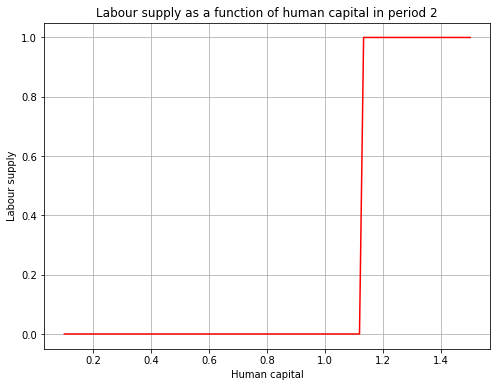

In [26]:
# Plotting figure
fig = plt.figure(figsize=(8,6))

# Adding subplot
ax = fig.add_subplot(1,1,1)

# Setting title
ax.set_title('Labour supply as a function of human capital in period 2')

# Plotting the labour supply
ax.plot(h_vec, l2_array, c='r')

# Setting y label
ax.set_ylabel('Labour supply')

# Setting x label
ax.set_xlabel('Human capital')

# Adding grid
ax.grid(True)

The figure above supports our initial statement. She will eventually decide to work although the wage is lower than the benifits of unemployment, but in order to do that she needs to be compensated by much higher levels of human capital than before. 

# 2. AS-AD model

Consider the following **AS-AD model**. The **goods market equilibrium** is given by

$$ y_{t} = -\alpha r_{t} + v_{t} $$

where $y_{t}$ is the **output gap**, $r_{t}$ is the **ex ante real interest** and $v_{t}$ is a **demand disturbance**. 

The central bank's **Taylor rule** is

$$ i_{t} = \pi_{t+1}^{e} + h \pi_{t} + b y_{t}$$

where $i_{t}$ is the **nominal interest rate**, $\pi_{t}$ is the **inflation gap**, and $\pi_{t+1}^{e}$ is the **expected inflation gap**. 

The **ex ante real interest rate** is given by 

$$ r_{t} = i_{t} - \pi_{t+1}^{e} $$

Together, the above implies that the **AD-curve** is

$$ \pi_{t} = \frac{1}{h\alpha}\left[v_{t} - (1+b\alpha)y_{t}\right]$$

Further, assume that the **short-run supply curve (SRAS)** is given by

$$ \pi_{t} = \pi_{t}^{e} + \gamma y_{t} + s_{t}$$

where $s_t$ is a **supply disturbance**.

**Inflation expectations are adaptive** and given by

$$ \pi_{t}^{e} = \phi\pi_{t-1}^{e} + (1-\phi)\pi_{t-1}$$

Together, this implies that the **SRAS-curve** can also be written as

$$ \pi_{t} = \pi_{t-1} + \gamma y_{t} - \phi\gamma y_{t-1} + s_{t} - \phi s_{t-1} $$

The **parameters** of the model are:

In [27]:
par = {}

par['alpha'] = 5.76
par['h'] = 0.5
par['b'] = 0.5
par['phi'] = 0
par['gamma'] = 0.075

**Question 1:** Use the ``sympy`` module to solve for the equilibrium values of output, $y_t$, and inflation, $\pi_t$, (where AD = SRAS) given the parameters ($\alpha$, $h$, $b$, $\alpha$, $\gamma$) and $y_{t-1}$ , $\pi_{t-1}$, $v_t$, $s_t$, and $s_{t-1}$. (We assume that the question was supposed to say "given the parameters ($\alpha$, $h$, $b$, $\phi$, $\gamma$)" rather than "given the parameters ($\alpha$, $h$, $b$, $\alpha$, $\gamma$)".)

**Question 2:** Find and illustrate the equilibrium when $y_{t-1} = \pi_{t-1} = v_t = s_t = s_{t-1} = 0$. Illustrate how the equilibrium changes when instead $v_t = 0.1$.

In [28]:
#Defining all the different variables from the given equations: 
y = sm.symbols('y_t')
yt = sm.symbols('y_t-1')
alpha = sm.symbols('alpha')
r = sm.symbols('r_t')
v = sm.symbols('v_t')
vt = sm.symbols('v_t-1')
i = sm.symbols('i_t')
pi = sm.symbols('pi_t')
pite = sm.symbols('pi_t+1^e')
pie = sm.symbols('pi_t^e')
piet = sm.symbols('pi_t-1^e')
pit = sm.symbols('pi_t-1')
h = sm.symbols('h')
b = sm.symbols('b')
gamma = sm.symbols('gamma')
s = sm.symbols('s_t')
st = sm.symbols('s_t-1')
phi= sm.symbols('phi')

Question 1: Solving for the equilibrium values of output is done by setting AD = SRAS: 

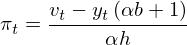

In [29]:
#Defining the AD curve by using the sympy equation function
AD = sm.Eq(pi,((v-((1+b*alpha)*y))/(h*alpha)))
AD

In [30]:
#Defining the SRAS curve by using the sympy equation function
SRAS = sm.Eq(pi,pit + gamma*y - phi*gamma*yt + s - phi*st)
SRAS

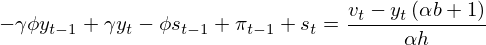

In [31]:
#Setting AD = SRAS 
SRAS_AD= sm.Eq(pit + gamma*y - phi*gamma*yt + s -phi*st , (v-(1+b*alpha)*y)/(h*alpha))
SRAS_AD

The equilibrum value of y is then:


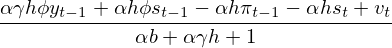

In [32]:
#Solving for y
y_star = sm.solve(SRAS_AD,y)[0]

print('The equilibrum value of y is then:')
y_star

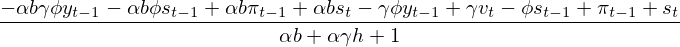

In [33]:
#Using the above result and inserting into the AD funcktion: 
pi_star = sm.Eq(pi,(1/(h*alpha))*(v-(1+b*alpha)*y_star))
pi_star = sm.solve(pi_star, pi)[0]
pi_star

In [34]:
#Converts sympy function to lambda function which allows for numerical analysis:
y_star1 = sm.lambdify((alpha,b,gamma,h,phi,yt,st,pit,s,v),y_star)
pi_star1 = sm.lambdify((alpha,b,gamma,h,phi,yt,st,pit,s,v),pi_star)


In [35]:
#Printing the equilibrium value of y:
print('The equilibrium value of y given the parameters is then:')
y_star1(par['alpha'],par['b'],par['gamma'],par['h'],par['phi'],yt,st,pit,s,v)

The equilibrium value of y given the parameters is then:


In [36]:
#Printing the equilibrium value of pi:
print('The equilibrium value of pi given the parameters is then:')
pi_star1(par['alpha'],par['b'],par['gamma'],par['h'],par['phi'],yt,st,pit,s,v)

The equilibrium value of pi given the parameters is then:


From the above two results one sees that the equilibrium value of $y$ with given the parameters depends negatively on inflation from the periode before, negatively on supply disturbances and positively on demand disturbances. On the contrary one sees that the equilibrium value of $\pi$ depends positively of the inflation from the period before, positively from supply disturbances, and also positively on demand disturbances. 

Question 2:

In [37]:
#Setting y_t-1 = pi_t-1 = v_t = s_t = s_t-1 = 0: 
pit = 0
v = 0
s = 0
st = 0
yt = 0
#And redefining the earlier parameters for simplification purposes:  
alpha = par['alpha'] 
h = par['h'] 
b = par['b']
phi = par['phi']
gamma = par['gamma'] 

In [38]:
#First we print the result of y and pi for v=0: 
y_star2 = y_star1(alpha,b,gamma,h,phi,yt,st,pit,s,v)
pi_star2 = pi_star1(alpha,b,gamma,h,phi,yt,st,pit,s,v)
print('y  = ' '%6.4f' % y_star2)
print('pi =' '%7.4f' % pi_star2)

y  = 0.0000
pi = 0.0000


In [39]:
#now we set v=0.1: 
v = 0.1
y_star3 = y_star1(alpha,b,gamma,h,phi,yt,st,pit,s,v)
pi_star3 = pi_star1(alpha,b,gamma,h,phi,yt,st,pit,s,v)
print('y  = ' '%6.4f' % y_star3)
print('pi =' '%7.4f' % pi_star3)

y  = 0.0244
pi = 0.0018


One sees that after the demand disturbance, the equilibrium value of output and inflation has shifted to a new and higher equilibrium value. 

In [40]:
#First we set v=0 and define a new variable vt=0.1, so that the supply disturbance can be illustrated: 
v=0 
vt=0.1

#Define three function, that are going to be the SRAS curve, AD curve (v=0) and a new AD curve (v=0.1)
def SRAS(y):
    return pit+(gamma*y)-(phi*gamma*yt)+s-(phi*st)
def AD(y):
    return ((1/(h*alpha))*v)-(1/(h*alpha)*((1+b*alpha)*y))
def AD_NEW(y):
    return ((1/(h*alpha))*vt)-((1/(h*alpha))*((1+b*alpha)*y))


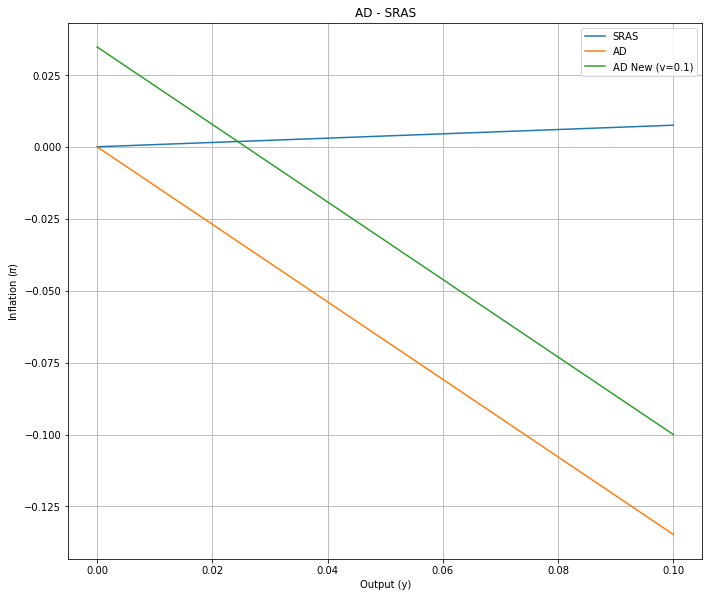

In [41]:
#Creating the plot: 

x = np.linspace(0,0.1,100)                         #Sets the x-axis from 0 to 0.10 and generates 100 samples

plot = plt.figure(figsize=(10,16))                 #Sets the figure size
ax = plot.add_subplot(211)                         # 211 describes the position of the plot
ax.plot(x,SRAS(x),label='SRAS')                    #Plots x and SRAS(x), and adds the label to the legend: 
ax.plot(x,AD(x),label='AD')                        #Plots z and AD(z), and adds the label to the legend:
ax.plot(x,AD_NEW(x),label='AD New (v=0.1)')        #Plots q and AD_NEW(q), and adds the label to the legend:
ax.set_title('AD - SRAS')                          #sets the title 
ax.set_xlabel('Output (y)')                        #labels x-axis
ax.set_ylabel('Inflation $(\pi)$')                 #labels y-axis

plt.grid()                                         #makes a grid
plt.legend()                                       #plots the legend
plt.tight_layout()                                 #automatically adjusts paramaters so that the figure has the right fit 

From the figure above one sees that with a demand shock (v=0.1), the AD curve is only affected and that it moves north-east. 

**Persistent disturbances:** Now, additionaly, assume that both the demand and the supply disturbances are AR(1) processes

$$ v_{t} = \delta v_{t-1} + x_{t} $$
$$ s_{t} = \omega s_{t-1} + c_{t} $$

where $x_{t}$ is a **demand shock**, and $c_t$ is a **supply shock**. The **autoregressive parameters** are:

In [42]:
par['delta'] = 0.80
par['omega'] = 0.15

**Question 3:** Starting from $y_{-1} = \pi_{-1} = s_{-1} = 0$, how does the economy evolve for $x_0 = 0.1$, $x_t = 0, \forall t > 0$ and $c_t = 0, \forall t \geq 0$?

Then we set these equal to the equilibrum value of $y_t$ and $\pi_t$ that we found earlier:

In [43]:
#Defining the supply and demand disturbances 
def v(vt,x):
    return par['delta']*vt+x
def s(st,c):
    return par['omega']*st+c

In [44]:
#Setting the number of periods to 100:
T = 100

#Creating vectors for the different variables: 
y_vec = [0]
pi_vec = [0]
v_vec = [0]
s_vec = [0]
c_vec = np.zeros(T) #A list of 0's
x_vec = np.zeros(T)

x_vec[1] = 0.1

In [45]:
#Setting the range and appending (updating) the vectors of the defined variables from above: 
for t in range(1,T):
    v_vec.append(v(v_vec[t-1], x_vec[t]))
    s_vec.append(s(s_vec[t-1], c_vec[t]))
    y_vec.append(y_star1(par['alpha'], par['b'],par['gamma'],par['h'],par['phi'],y_vec[t-1],s_vec[t-1],pi_vec[t-1],s_vec[t],v_vec[t]))
    pi_vec.append(pi_star1(par['alpha'], par['b'],par['gamma'],par['h'],par['phi'],y_vec[t-1],s_vec[t-1],pi_vec[t-1],s_vec[t],v_vec[t]))


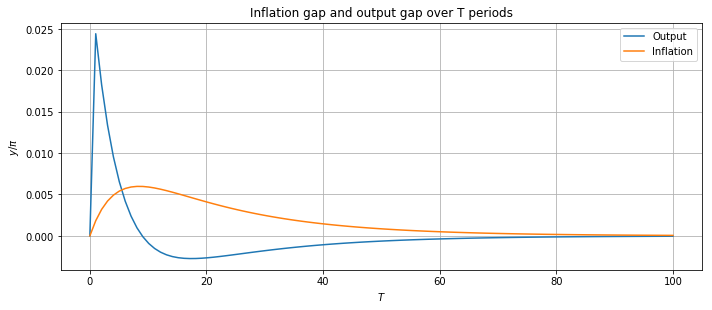

In [46]:
# Creating a figure:

periods = np.linspace(0,T,T)                                        #Returns evenly spaced points over the given period - standard is set to 50 samples 
plot = plt.figure(figsize=(10,8))                                   #plots figure with a specified size
ax = plot.add_subplot(211)                                          #211 describes the position of the plot
ax.plot(periods,y_vec, label='Output')                              #plots output gap 
ax.plot(periods,pi_vec, label='Inflation')                          #plots inflation gap 
ax.set_title('Inflation gap and output gap over T periods')         #sets title
ax.set_xlabel('$T$')                                                #sets x-axis
ax.set_ylabel('$y / \pi$')                                          #sets y-axis

plt.grid()                                                          #makes a grid
plt.legend()                                                        #creates a legend from the labels
plt.tight_layout()                                                  #automatically adjusts paramaters so that figure has right fit 

The above figure shows an immediate increase in output after the initial period. Thereafter it illustrates a falling output gap, until it begins to rise again and converge towards 0. The inflation gap on the other hand also experiences an increase after the initial period, however at a less vicious extent. After around 10 periods, the inflation gap begins to decrease and converges towards 0. 

**Stochastic shocks:** Now, additionally, assume that $x_t$ and $c_t$ are stochastic and normally distributed

$$ x_{t}\sim\mathcal{N}(0,\sigma_{x}^{2}) $$
$$ c_{t}\sim\mathcal{N}(0,\sigma_{c}^{2}) $$

The **standard deviations of the shocks** are:

In [47]:
par['sigma_x'] = 3.492
par['sigma_c'] = 0.2

**Question 4:** Simulate the AS-AD model for 1,000 periods. Calculate the following five statistics:

1. Variance of $y_t$, $var(y_t)$
2. Variance of $\pi_t$, $var(\pi_t)$
3. Correlation between $y_t$ and $\pi_t$, $corr(y_t,\pi_t)$
4. Auto-correlation between $y_t$ and $y_{t-1}$, $corr(y_t,y_{t-1})$
5. Auto-correlation between $\pi_t$ and $\pi_{t-1}$, $corr(\pi_t,\pi_{t-1})$

In [48]:
#Firstly we set the seed: 
np.random.seed(1997)
#Number of periods: 
T = 1000

#We make new vectors and include the standard deviation in the vectors of the x and c: 
v_2_vec = [0]
s_2_vec = [0]
y_2_vec = [0]
pi_2_vec = [0]
x_2_vec = np.random.normal(scale=par['sigma_x'], loc=0, size=T) #np.random.normal implies a normally distributed set of data 
c_2_vec = np.random.normal(scale=par['sigma_c'], loc=0, size=T)



In [49]:
#define the range of the simulation and append the vectors defined above: 
for t in range(1,T):
    v_2_vec.append(v(v_2_vec[t-1], x_2_vec[t]))
    s_2_vec.append(s(s_2_vec[t-1], c_2_vec[t]))
    y_2_vec.append(y_star1(par['alpha'], par['b'],par['gamma'],par['h'],par['phi'],y_2_vec[t-1],s_2_vec[t-1],pi_2_vec[t-1],s_2_vec[t],v_2_vec[t]))
    pi_2_vec.append(pi_star1(par['alpha'], par['b'],par['gamma'],par['h'],par['phi'],y_2_vec[t-1],s_2_vec[t-1],pi_2_vec[t-1],s_2_vec[t],v_2_vec[t]))
    

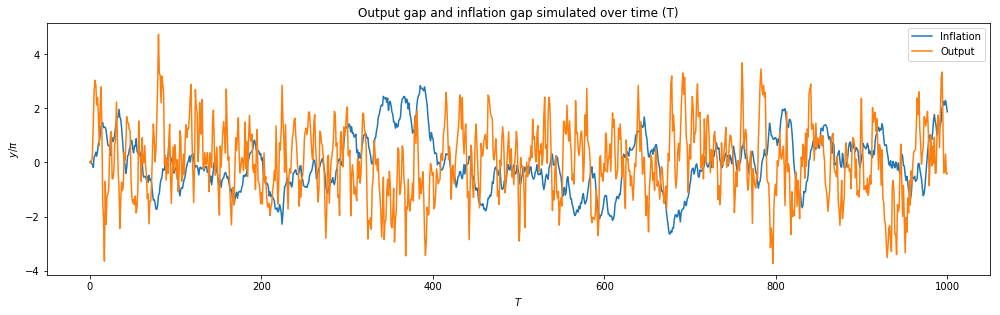

In [50]:

periods = np.linspace(0,T,T)                                         #Returns evenly spaced points over the given period - standard is set to 50 samples 
plot = plt.figure(figsize=(14,12))                                   #sets figure size 
ax = plot.add_subplot(313)                                           #313 describes the position of the plot
ax.plot(periods, pi_2_vec, label='Inflation')                        #plots inflation gap
ax.plot(periods, y_2_vec, label='Output')                            #plots output gap
ax.set_title('Output gap and inflation gap simulated over time (T)') #sets title 
ax.set_xlabel('$T$')                                                 #sets x-axis
ax.set_ylabel('$y$/$\pi$')                                           #sets y-axis

plt.legend()                                                         #creates legend from the labels
plt.tight_layout()                                                   #automatically adjusts paramaters so that figure has right fit 

In [51]:
var_y = np.var(y_2_vec)                                                       #takes the variance of the simulated output gap 
var_pi = np.var(pi_2_vec)                                                     #takes the variance of the simulated inflation gap 
corr_y_pi = np.corrcoef(y_2_vec,pi_2_vec)[0,1]                                #finds the correlation between output gap and inflation gap 
corr_y_auto = np.corrcoef(y_2_vec[1:],y_2_vec[:-1])[0,1]                      #finds correlation between output gap in one period and the period before
corr_pi_auto = np.corrcoef(pi_2_vec[1:],pi_2_vec[:-1])[0,1]                   #finds correlation between output gap in one period and the period before
print('Variance of y is:' '%35.3f' % var_y)
print('Variance of pi is:' '%34.3f' % var_pi)
print('Correlation coefficient of y and pi is:' '%13.3f' % corr_y_pi)
print('Correlation coefficient of y_t and y_t-1 is:' '%8.3f' % corr_y_auto)
print('Correlation coefficient of pi_t and pi_t-1 is:' '%6.3f' % corr_pi_auto)

Variance of y is:                              1.762
Variance of pi is:                             1.044
Correlation coefficient of y and pi is:       -0.203
Correlation coefficient of y_t and y_t-1 is:   0.749
Correlation coefficient of pi_t and pi_t-1 is: 0.979


**Question 5:** Plot how the correlation between $y_t$ and $\pi_t$ changes with $\phi$. Use a numerical optimizer or root finder to choose $\phi\in(0,1)$ such that the simulated correlation between $y_t$ and $\pi_t$ comes close to 0.31. 

In [52]:

T=1000                                                          #Number og periods for simulation
x_3_vec = np.random.normal(scale=par['sigma_x'], loc=0, size=T) #Defines demand shock vector that is normally distributed 
c_3_vec = np.random.normal(scale=par['sigma_c'], loc=0, size=T) #Defines supply shock vector that is normally distributed 


In [53]:
def simulate_phi(phi):
    #Defining new vectors 
    v_3_vec = [0]                        
    s_3_vec = [0]
    y_3_vec = [0]
    pi_3_vec = [0]
    
    #Setting range for simulation and appending vectors to the above defined vectors: 
    for t in range(1,T):
        v_3_vec.append(v(v_3_vec[t-1], x_3_vec[t]))
        s_3_vec.append(s(s_3_vec[t-1], c_3_vec[t]))
        y_3_vec.append(y_star1(par['alpha'], par['b'],par['gamma'],par['h'],phi,y_3_vec[t-1],s_3_vec[t-1],pi_3_vec[t-1],s_3_vec[t],v_3_vec[t]))
        pi_3_vec.append(pi_star1(par['alpha'], par['b'],par['gamma'],par['h'],phi,y_3_vec[t-1],s_3_vec[t-1],pi_3_vec[t-1],s_3_vec[t],v_3_vec[t]))
    corr_2_y_pi = np.corrcoef(y_3_vec,pi_3_vec)[0,1]
    return corr_2_y_pi #Returns the correlation between y and pi 

In [54]:

corr_2_y_pi = simulate_phi(par['phi'])
phi_sim = np.linspace(0,1,T)            #Setting evenly distributed points from 0 to 1 
plot_corr = []                          #Creates empty vector
corr_val = 0.31                         #Sets the wanted correlation coefficient
corr_vec = []                           #Creates empyt vector 

#Appends the correlation coefficient between y and pi and appends a correlation coefficient value of 0.31 for the given period: 
for x in phi_sim:
    corr_2_y_pi = simulate_phi(x)       
    plot_corr.append(corr_2_y_pi)       
    corr_vec.append(corr_val)

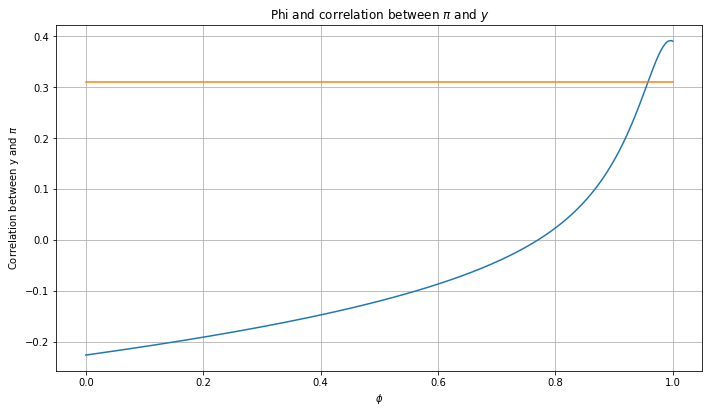

In [55]:
plot = plt.figure(figsize=(10,16))                          #sets figure size 
ax = plot.add_subplot(313)                                  #313 describes the position of the plot                
ax.set_xlabel('$\phi$')                                     #sets x-axis 
ax.set_ylabel('Correlation between y and $\pi$')            #sets y-axis
ax.set_title('Phi and correlation between $\pi$ and $y$')   #sets title 
ax.plot(phi_sim , plot_corr)                                #plots correlation coefficient of y and pi for given values of phi
ax.plot(phi_sim, corr_vec)                                  #plots a horizantal line with a correlation coefficient of 0.31 
plt.grid()                                                  #plots a grid
plt.tight_layout()                                          #automatically adjusts paramaters so that figure has right fit 
plt.show() 

From the above figure one can see that the value of $\phi$ at the intersection with the line showing a correlation of 0.31 between y and $\pi$ lies at around 0.95. 

In [56]:
def optimal_phi(x):                                                        # defines function 
    return (simulate_phi(x)-0.31)**2                                       # **2 for positive values only                                     

result = optimize.minimize(optimal_phi,0.95)                               #Minimizes the optimal_phi function with a guess of phi being equal to 0.95 
phi_val = result.x[0]                                                      #Extracts the x-value that was found 

print(f'The value of phi that makes the correlation between y and pi be 0.31 is phi = {phi_val:.4f}')

The value of phi that makes the correlation between y and pi be 0.31 is phi = 0.9577


**Quesiton 6:** Use a numerical optimizer to choose $\sigma_x>0$, $\sigma_c>0$ and $\phi\in(0,1)$ to make the simulated statistics as close as possible to US business cycle data where:

1. $var(y_t) = 1.64$
2. $var(\pi_t) = 0.21$
3. $corr(y_t,\pi_t) = 0.31$
4. $corr(y_t,y_{t-1}) = 0.84$
5. $corr(\pi_t,\pi_{t-1}) = 0.48$

# 3. Exchange economy

Consider an **exchange economy** with

1. 3 goods, $(x_1,x_2,x_3)$
2. $N$ consumers indexed by \\( j \in \{1,2,\dots,N\} \\)
3. Preferences are Cobb-Douglas with log-normally distributed coefficients

    $$ \begin{eqnarray*}
    u^{j}(x_{1},x_{2},x_{3}) &=& 
    \left(x_{1}^{\beta_{1}^{j}}x_{2}^{\beta_{2}^{j}}x_{3}^{\beta_{3}^{j}}\right)^{\gamma}\\
     &  & \,\,\,\beta_{i}^{j}=\frac{\alpha_{i}^{j}}{\alpha_{1}^{j}+\alpha_{2}^{j}+\alpha_{3}^{j}} \\
     &  & \,\,\,\boldsymbol{\alpha}^{j}=(\alpha_{1}^{j},\alpha_{2}^{j},\alpha_{3}^{j}) \\ 
     &  & \,\,\,\log(\boldsymbol{\alpha}^j) \sim \mathcal{N}(\mu,\Sigma) \\
    \end{eqnarray*} $$

4. Endowments are exponentially distributed,

$$
\begin{eqnarray*}
\boldsymbol{e}^{j} &=& (e_{1}^{j},e_{2}^{j},e_{3}^{j}) \\
 &  & e_i^j \sim f, f(z;\zeta) =  1/\zeta \exp(-z/\zeta)
\end{eqnarray*}
$$

Let $p_3 = 1$ be the **numeraire**. The implied **demand functions** are:

$$
\begin{eqnarray*}
x_{i}^{\star j}(p_{1},p_{2},\boldsymbol{e}^{j})&=&\beta^{j}_i\frac{I^j}{p_{i}} \\
\end{eqnarray*}
$$

where consumer $j$'s income is

$$I^j = p_1 e_1^j + p_2 e_2^j +p_3 e_3^j$$

The **parameters** and **random preferences and endowments** are given by:

In [57]:
# a. parameters
N = 50000
mu = np.array([3,2,1])
Sigma = np.array([[0.25, 0, 0], [0, 0.25, 0], [0, 0, 0.25]])
gamma = 0.8
zeta = 1

# b. random draws
seed = 1986
np.random.seed(seed)

# preferences
alphas = np.exp(np.random.multivariate_normal(mu, Sigma, size=N))
betas = alphas/np.reshape(np.sum(alphas,axis=1),(N,1))

# endowments
e1 = np.random.exponential(zeta,size=N)
e2 = np.random.exponential(zeta,size=N)
e3 = np.random.exponential(zeta,size=N)

**Question 1:** Plot the histograms of the budget shares for each good across agents.


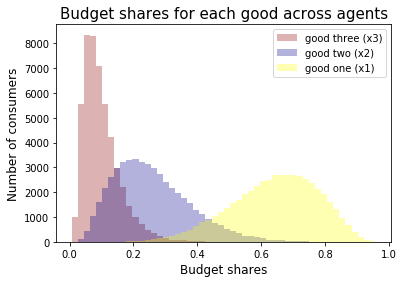

In [58]:
# The following code will creat a histogram of the budget shares for each good across agents prefenrences.
plt.hist(betas, bins = 50, histtype = 'stepfilled', alpha=0.3, color= ('yellow','darkblue','darkred'), label=['good one (x1)','good two (x2)','good three (x3)']) # creating a histogram as a array of betas.

# Adding y label.
plt.ylabel('Number of consumers', fontsize = 12) 

# Adding x label.
plt.xlabel('Budget shares', fontsize = 12) 

# Adding title.
plt.title('Budget shares for each good across agents', fontsize = 15) 

# Adding legend.
plt.legend() 



As a result of the visual presentation it is possible to conclude that good one is the most precious good, since it has the biggest budget share. Followed by good two, which means that good three is the least valuble good with respect to budget share. 

Consider the **excess demand functions:**

$$ z_i(p_1,p_2) = \sum_{j=1}^N x_{i}^{\star j}(p_{1},p_{2},\boldsymbol{e}^{j}) - e_i^j$$

**Question 2:** Plot the excess demand functions.

In [59]:
# Seperating each beta element in relation to each good

# Good 1 
beta_goodone = betas[:,0] 

# Good 2
beta_goodtwo = betas[:,1] 

# Good 3 
beta_goodthree = betas[:,2]

In [60]:
# Defining demand functions for each good 

def demand_goodone(betas, e1, e2, e3, p1, p2, p3) : 
    
    # Defining income 
    I = e1*p1 + e2*p2 + p3*e3
    
    # b. Demand
    return beta_goodone*I/p1


def demand_goodtwo(betas, e1, e2, e3, p1, p2, p3) :
    
    
    # Defining income
    I = e1*p1 + e2*p2 + p3*e3
    
    # b. Demand
    return beta_goodtwo*I/p2


def demand_goodthree(betas, e1, e2, e3, p1, p2, p3) :
    
    
    # Defining income
    I = e1*p1 + e2*p2 + p3*e3
    
    # b. Demand
    return beta_goodthree*I/p3

In [61]:
# Defining excess demand functions for each good

def excess_demandone(betas, e1, e2, e3, p1, p2, p3) :
    
    # a. Supply
    supply_one = np.sum(e1) 
    
    # b. Demand
    demand_one = np.sum(demand_goodone(betas, e1, e2, e3, p1, p2, p3))
    
    # c. Excess demand
    excess_demand_good_one = demand_one-supply_one 
    
    return excess_demand_good_one


def excess_demandtwo(betas, e1, e2, e3, p1, p2, p3) :
    
    # a. Supply
    supply_two = np.sum(e2)
    
    # b. Demand
    demand_two = np.sum(demand_goodtwo(betas, e1, e2, e3, p1, p2, p3))
    
    # c. Excess demand
    excess_demand_good_two = demand_two-supply_two 
    
    
    return excess_demand_good_two


def excess_demandthree(betas, e1, e2, e3, p1, p2, p3) :
    
    # a. Supply
    supply_three = np.sum(e3)
    
    # b. Demand
    demand_three = np.sum(demand_goodthree(betas, e1, e2, e3, p1, p2, p3))
    
    # c. Excess demand
    excess_demand_good_three = demand_three-supply_three 
    
    
    return excess_demand_good_three


The following code will create three new functions with the purpose of plotting the excess demand for each good. 
The excess demand for good one will have good 2 and 3 set as numeraire - focus on the relative prices. The same course of action is used for good two and three.


In [62]:

# Creating three price vector with 25 prices betweem 0 and 2. 
price_goodone = price_goodtwo = price_goodthree = np.linspace(start = 0.1, stop = 2, num = 25)

# Creating empty fucntion to cotain excess demands
# Good 1 
excess_demand_goodone = [] 

# Good 2 
excess_demand_goodtwo = [] 

# Good 3 
excess_demand_goodthree = [] 

# Setting all prices as numeraire
p1 = 1
p2 = 1
p3 = 1 

# Adding values to the functions above. 
for price in price_goodone: 
    excess_demand_goodone.append(excess_demandone(betas, e1 ,e2 ,e3, price , p2, p3))
for price in price_goodtwo:
    excess_demand_goodtwo.append(excess_demandtwo(betas, e1, e2, e3, p1, price, p3))
for price in price_goodthree:
    excess_demand_goodthree.append(excess_demandthree(betas, e1, e2, e3, p1, p2, price))

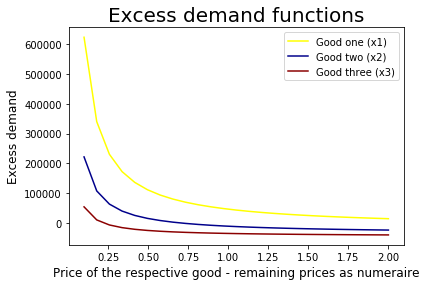

In [63]:
# Plotting the functions above

# Adding functions to the plot
plt.plot(price_goodone, excess_demand_goodone, color = 'yellow', label = 'Good one (x1)')
plt.plot(price_goodtwo, excess_demand_goodtwo, color = 'darkblue', label = 'Good two (x2)')
plt.plot(price_goodthree, excess_demand_goodthree, color = 'darkred', label = 'Good three (x3)')

# Adding Y label
plt.ylabel('Excess demand', fontsize = 12) 

# Adding X label
plt.xlabel('Price of the respective good - remaining prices as numeraire', fontsize = 12) 

# Adding title
plt.title('Excess demand functions', fontsize = 20) 

# Setting Legend to default
plt.legend()

Following the result in Question 1, it seems plausible that the demand for good one would be affected the most when prices change.
When the prices converge towards 0 the excess demand functions start to rise more exponentially. This is a results of the supply being independent of the prices. 

**Quesiton 3:** Find the Walras-equilibrium prices, $(p_1,p_2)$, where both excess demands are (approximately) zero, e.g. by using the following tâtonnement process:

1. Guess on $p_1 > 0$, $p_2 > 0$ and choose tolerance $\epsilon > 0$ and adjustment aggressivity parameter, $\kappa > 0$.
2. Calculate $z_1(p_1,p_2)$ and $z_2(p_1,p_2)$.
3. If $|z_1| < \epsilon$ and $|z_2| < \epsilon$ then stop.
4. Else set $p_1 = p_1 + \kappa \frac{z_1}{N}$ and $p_2 = p_2 + \kappa \frac{z_2}{N}$ and return to step 2.

The following code will simulate the excess demand functions in relation to the respective price by using the given tâtonnement process. The main purpose is to find the prices that ensures market clearing - Walras-equilibrium 

In [64]:
# Defining function -- Step 1 
def find_equilibrium(betas, p1, p2, e1, e2, e3, kappa, eps, maxiter=50000) : 
    
    """ 
    Walras-equilibrium
    
    Kwargs:
    
        Betas, preferences. 
        p, prices for each good.
        e, endownments for each good across agents.
        k/kappa, the aggressivity parameter.
        eps, ensures that the excess demand is close to 0. 
        maxiter, the maximum amount of iterations. 
        
        """  
    
    
    # Setting start simulation value
    t = 0 
   
    # Defining Z values
    while t < 50000 : 
        Z1 = excess_demandone(betas, e1, e2, e3, p1, p2, 1)
        Z2 = excess_demandtwo(betas, e1, e2, e3, p1, p2, 1)
        
        # a. Setting the course of action when the given requirements is accomplished -- Step 3 and (2)
        if (np.abs(Z1) < eps and np.abs(Z2) < eps) or t >= maxiter : 
            print(f'{t:3d}: p1 = {p1:12.8f} -> Excess demnad -> {Z1:14.8f}')
            print(f'{t:3d}: p2 = {p2:12.8f} -> Excess demnad -> {Z2:14.8f}')
            p1_wal_eq = p1
            p2_wal_eq = p2
            print(f'\nThe walras equilibrium prices: p1 = {p1:.5f} and p2 = {p2:.5f}')
            break
        
        # prices for next iteration when requirements are not accomplished.  
        else:
            p1 = p1 + kappa*Z1/betas.size
            p2 = p2 + kappa*Z2/betas.size
        
        # b. setting the course of action for iteration -- Step 4 and (2)
        if t < 5 or t%2000 == 0: 
            print(f'{t:3d}: p1 = {p1:10.4f} -> Excess demand -> {Z1:10.8f}')
            print(f'{t:3d}: p2 = {p2:10.4f} -> Excess demand -> {Z2:10.8f}')
        
        elif t == 5 :
            print('   ...')
            
        t += 1 
    return p1,p2

In [65]:
# Setting start values for prices
p1 = 6.4 
p2 = 2.6 

# setting aggressivity parameter
kappa = 0.1

# setting requirement for ~ 0 
eps = 0.1**8

# Initiating simulation 
p1_wal_eq, p2_wal_eq = find_equilibrium(betas, p1, p2, e1, e2, e3, kappa=kappa, eps=eps)

  0: p1 =     6.4001 -> Excess demand -> 167.69618509
  0: p2 =     2.5999 -> Excess demand -> -208.87731268
  1: p1 =     6.4002 -> Excess demand -> 166.68692269
  1: p2 =     2.5997 -> Excess demand -> -206.35986966
  2: p1 =     6.4003 -> Excess demand -> 165.68796134
  2: p2 =     2.5996 -> Excess demand -> -203.86916393
  3: p1 =     6.4004 -> Excess demand -> 164.69919196
  3: p2 =     2.5995 -> Excess demand -> -201.40491908
  4: p1 =     6.4006 -> Excess demand -> 163.72050659
  4: p2 =     2.5993 -> Excess demand -> -198.96686143
   ...
2000: p1 =     6.4653 -> Excess demand -> 22.70679083
2000: p2 =     2.6075 -> Excess demand -> 8.47125674
4000: p1 =     6.4827 -> Excess demand -> 6.68423796
4000: p2 =     2.6140 -> Excess demand -> 2.49363341
6000: p1 =     6.4879 -> Excess demand -> 1.97507317
6000: p2 =     2.6159 -> Excess demand -> 0.73681855
8000: p1 =     6.4894 -> Excess demand -> 0.58424592
8000: p2 =     2.6165 -> Excess demand -> 0.21795763
10000: p1 =     6.4899 

The walras-equilibrium is insured when the price of good one is 6.49006 and the price of good two is 2.61169.
to ensure that the excess demand for both goods are some what close to zero, numpys absolute function is used to calculate the absolute values for each element. 

In [66]:
Z1 = excess_demandone(betas, e1, e2, e3, p1_wal_eq, p2_wal_eq, 1)
Z2 = excess_demandtwo(betas, e1, e2, e3, p1_wal_eq, p2_wal_eq, 1)

print(Z1,Z2)
assert(np.abs(Z1) < eps)
assert(np.abs(Z2) < eps)
# kommenter -  skriv noget her

9.989889804273844e-09 3.790773916989565e-09


**Question 4:** Plot the distribution of utility in the Walras-equilibrium and calculate its mean and variance.

The following coding defines the given utility function with Walras-equilibrium prices.

In [67]:
def utility(p1, p2, e1, e2, e3, betas, gamma) : 
    
    # Defining income
    I = p1*e1 + p2*e2 + e3
    
    # Defining X values
    # Good one
    x1 = beta_goodone*I/p1
    
    # Good two
    x2 = beta_goodtwo*I/p2
    
    # Good three
    x3 = beta_goodthree*I
    
    # Defining utility function. 
    Utility_Func = ((x1**beta_goodone)*(x2**beta_goodtwo)*(x3**beta_goodthree))**gamma
    
    
    return Utility_Func

In [68]:
#Defining utility in walras-eqilibrium 
utility_wal_eq = utility(p1_wal_eq, p2_wal_eq, e1, e2, e3, betas, gamma) 

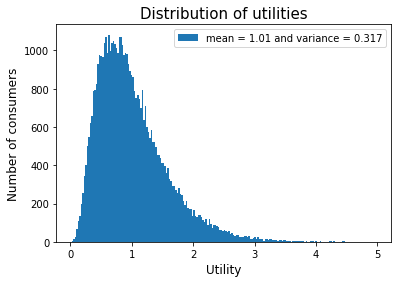

In [69]:
# Calculation mean for utility in walras-eqilibrium 
mean = np.mean(utility_wal_eq)

# Calculation variance for utility in walras-eqilibrium 
var = np.var(utility_wal_eq)

# Plotting results
 # creating a histogram as a array of betas.
plt.hist(utility_wal_eq, bins = 200, label = f'mean = {round(mean,3)} and variance = {round(var,3)}')

# Adding Y label.
plt.ylabel('Number of consumers', fontsize = 12)

# adding X label.
plt.xlabel('Utility', fontsize = 12) 

# Adding title.
plt.title('Distribution of utilities', fontsize = 15)

# Adding legend
plt.legend() 

In [70]:
print(f'excact values of mean and variance')
print(f' mean = {mean}')
print(f' variance = {var}')

excact values of mean and variance
 mean = 1.010164459864371
 variance = 0.3173402050017872


**Question 5:** Find the Walras-equilibrium prices if instead all endowments were distributed equally. Discuss the implied changes in the distribution of utility. Does the value of $\gamma$ play a role for your conclusions?

In [71]:
# Creating new equally distrubted endownments.
new_e1 = new_e2 = new_e3 = np.linspace(1,20, num=50000)

# Setting start values for simulation
p1 = 6.4
p2 = 2.5

# Initiating simulation
new_p1_wal_eq, new_p2_wal_eq = find_equilibrium(betas, p1, p2, new_e1, new_e2, new_e3, kappa=kappa, eps=eps)

  0: p1 =     6.3978 -> Excess demand -> -3337.84799053
  0: p2 =     2.5077 -> Excess demand -> 11587.05184518
  1: p1 =     6.3959 -> Excess demand -> -2866.52175760
  1: p2 =     2.5145 -> Excess demand -> 10231.32616167
  2: p1 =     6.3942 -> Excess demand -> -2451.63016219
  2: p2 =     2.5206 -> Excess demand -> 9044.05209136
  3: p1 =     6.3928 -> Excess demand -> -2086.26965999
  3: p2 =     2.5259 -> Excess demand -> 8002.85120452
  4: p1 =     6.3917 -> Excess demand -> -1764.42783955
  4: p2 =     2.5306 -> Excess demand -> 7088.63681123
   ...
2000: p1 =     6.4528 -> Excess demand -> 0.00176793
2000: p2 =     2.5927 -> Excess demand -> 0.00065734
3870: p1 =   6.45278824 -> Excess demnad ->     0.00000001
3870: p2 =   2.59273606 -> Excess demnad ->     0.00000000

The walras equilibrium prices: p1 = 6.45279 and p2 = 2.59274


The new walras-eqilibirum prices with equally distributed endowsments is 6.45279 for good one and 2.59274 for good two

In [72]:
def utility_gamma(gamma) : 
    
    # Defining the two utility functions 
    utility_weq = utility(p1_wal_eq, p2_wal_eq, e1, e2, e3, betas, gamma)
    new_utility_weq = utility(new_p1_wal_eq, new_p2_wal_eq, new_e1, new_e2, new_e3, betas, gamma)
    
    # Calculation means and variances. 
    mean = np.mean(utility_weq)
    var = np.var(utility_weq)
    new_mean = np.mean(new_utility_weq)
    new_var = np.var(new_utility_weq)
    
    
    fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2,sharey=True, figsize=(15,5))

    # Plotting utility destributions for new values
    ax1.hist(new_utility_weq, bins=200, label = f'mean = {round(new_mean,3)} and variance = {round(new_var,3)}')
    
    # Adding title
    ax1.set_title('Distribution of utilites with equally distrubuted endowments', fontsize = 12)
    
    # Adding X label
    ax1.set_xlabel('Utility', fontsize = 12)
    
    # Adding Y label
    ax1.set_ylabel('Consumers', fontsize = 12)
    
    # Setting legend
    ax1.legend()

    # Plotting utility destributions for given values
    ax2.hist(utility_weq, bins= 200, label = f'mean = {round(mean,3)} and variance = {round(var,3)}')
    
    # Adding title
    ax2.set_title('Distribution of utilities with exponential distributed endowments', fontsize = 12)
    
    # Adding X label
    ax2.set_xlabel('Utility', fontsize = 12)
    
    # Setting legend
    ax2.legend()
    
    
    # Making plots interative
widgets.interact(utility_gamma,
    gamma = widgets.FloatSlider(description = "Gamma value", min= 0.1, max = 2, step=0.05, value = 0.8));

interactive(children=(FloatSlider(value=0.8, description='Gamma value', max=2.0, min=0.1, step=0.05), Output()…

By having equally distributed endownments the utility is spread more evenly between the consumers. A lower gamma value will result in a much lower level of utility in both cases - lower mean. But a more 'fair' distribution of utility. 
A high Gamma will increase the overall level of utility but at the same time result in a more uneven distribution of utility - higher variance. 